#### Importing Data and Library

In [3]:
import requests
from html.parser import HTMLParser
import nlp_rake
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#### Getting Required Data

In [4]:
# Define the URL of the page to scrape
url = "https://en.wikipedia.org/wiki/Artificial_intelligence"

# Get the HTML content from the URL
text = requests.get(url).content.decode("utf-8")

# Optional: Display the first 1000 characters of the HTML content
print(text[:1000])


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Artificial intelligence - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-f

#### Transforming Data

In [5]:
# Define a custom HTML parser class to extract text data
class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True

    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False

    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += " " + data.replace("[ edit ]", "")

# Create an instance of the custom parser
parser = MyHTMLParser()

# Feed the HTML content into the parser
parser.feed(text)

# Get the parsed text
text = parser.res

# Optional: Display the first 1000 characters of the extracted text
print(text[:1000])

 Artificial intelligence - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Goals Toggle Goals subsection 1.1 Reasoning and problem-solving 1.2 Knowledge representation 1.3 Planning and decision-making 1.4 Learning 1.5 Natural language processing 1.6 Perception 1.7 Social intelligence 1.8 General intelligence 2 Techniques Toggle Techniques subsection 2.1 Search and optimization 2.1.1 State space search 2.1.2 Local search 2.2 Logic 2.3 Probabilistic methods for uncertain reasoning 2.4 Classifiers and statistical learning methods 2.5 Artificial neural networks 2.6 Deep learning 2.7 GPT 2.8 Specialized hardware and

#### Extracting Keywords

In [6]:
# Set up the RAKE keyword extractor
extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)

# Apply RAKE to extract keywords from the text
res = extractor.apply(text)

# Display the extracted keywords
res

[('autonomous vehicles', 4.0),
 ('21st century', 4.0),
 ('speech recognition', 4.0),
 ('virtual assistants', 4.0),
 ('gradient descent', 4.0),
 ('neural networks', 4.0),
 ('data centers', 4.0),
 ('bad actors', 4.0),
 ('algorithmic bias', 4.0),
 ('existential risk', 4.0),
 ('elon musk', 4.0),
 ('scientific american', 4.0),
 ('issn 0261-3077', 4.0),
 ('ars technica', 4.0),
 ('fox news', 4.0),
 ('2nd ed', 4.0),
 ('bbc news', 4.0),
 ('^ wong', 3.9958677685950414),
 ('ai winter', 3.9931972789115644),
 ('regulate ai', 3.9931972789115644),
 ('strong ai', 3.9931972789115644),
 ('ai welfare', 3.9931972789115644),
 ('ai magazine', 3.9931972789115644),
 ('recommendation systems', 3.9130434782608696),
 ('ai systems', 3.9062407571724345),
 ('make decisions', 3.9),
 ('affective computing', 3.9),
 ('modern ai', 3.8820861678004537),
 ('artificial intelligence', 3.8819444444444446),
 ('intelligence explosion', 3.8819444444444446),
 ('generative ai', 3.826530612244898),
 ('deep learning', 3.803921568627

#### Analyze Result

In [7]:
# Optionally, you can analyze or process the extracted keywords further
# For example, displaying the top 10 keywords
top_keywords = sorted(res, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Keywords:")
for keyword, score in top_keywords:
    print(f"{keyword}: {score}")


Top 10 Keywords:
autonomous vehicles: 4.0
21st century: 4.0
speech recognition: 4.0
virtual assistants: 4.0
gradient descent: 4.0
neural networks: 4.0
data centers: 4.0
bad actors: 4.0
algorithmic bias: 4.0
existential risk: 4.0


#### Visualizing Data

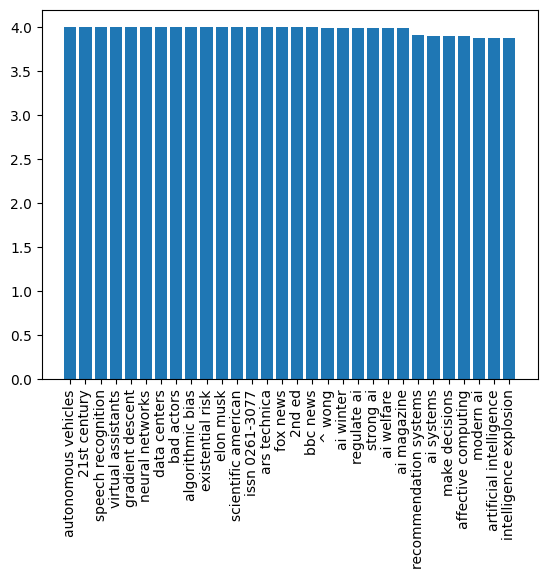

In [8]:
def plot(pair_list):
    k, v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation="vertical")
    plt.show()


plot(res[:30])

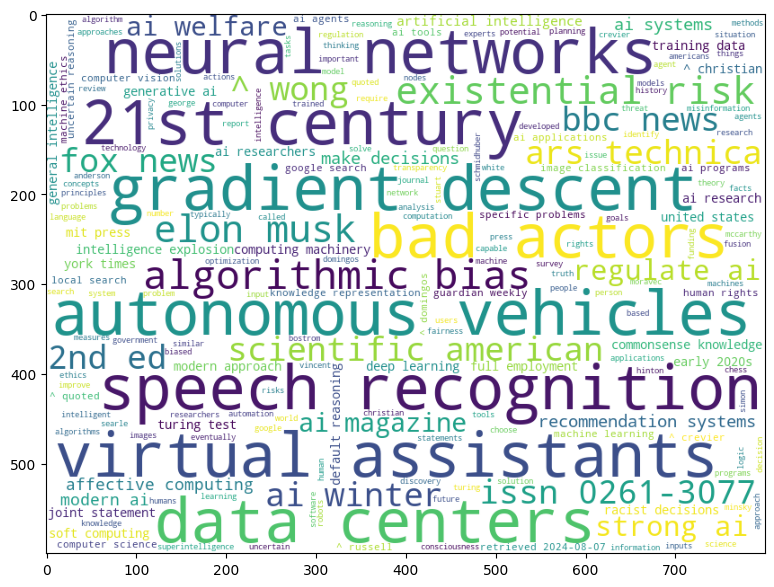

In [9]:
wc = WordCloud(background_color="white", width=800, height=600)
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
plt.show()

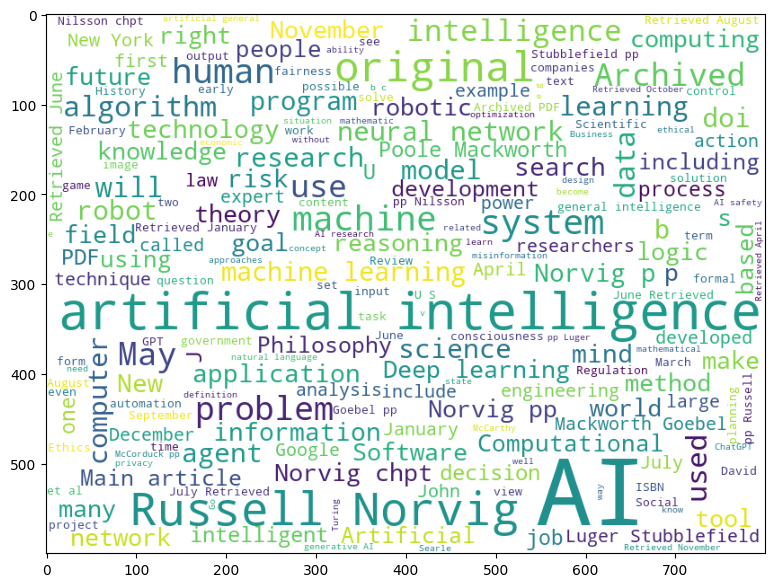

In [10]:
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate(text))
plt.show()